In [3]:
import numpy as np
import matplotlib.pyplot as plt

# PDH Locking

<p align="center">
  <img src="images/pdhlocking.png" width="500"/>
</p>

Systematic and quantitative analysis of residual amplitude modulation in Pound-Drever-Hall frequency stabilization - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/The-experimental-setup-for-PDH-frequency-locking-P1-and-P2-are-the-polarizers-aligned_fig1_286236886 [accessed 18 Jun 2025]

Beam Path: Laser → P1 → EOM → P2 → PBS → λ/4 → MODE MATCHING LENSES → Cavity (flat-concave)



## Cavity Waist for a Plano-Concave Fabry–Pérot Cavity

Consider a plano-concave cavity with:

- Flat mirror at \( z = 0 \)
- Concave mirror at \( z = L \), with radius of curvature \( R \)
- Laser wavelength 1064 nm

### 1. Stability Condition

$$
0 < L < R
$$

### 2. Rayleigh Range \( z_R \)

The cavity eigenmode has its waist at the flat mirror:

$$
z_R = \sqrt{L(R - L)}
$$

### 3. Waist Size \( w_0 \)

$$
w_0 = \sqrt{ \frac{\lambda}{\pi} z_R }
= \sqrt{ \frac{\lambda}{\pi} \sqrt{L(R - L)} }
$$

### 4. Beam Radius at Curved Mirror

$$
w(L) = w_0 \sqrt{1 + \left( \frac{L}{z_R} \right)^2 }
$$




In [5]:
def cavity_waist(lambda0, L2, Rc):
    """
    Calculate the waist size (w0) and Rayleigh range (zR) of a plano-concave optical cavity.
    
    Parameters:
    lambda0 : float
        Laser wavelength in meters.
    L2 : float
        Cavity length in meters (distance between flat and curved mirror).
    Rc : float
        Radius of curvature of the concave mirror in meters.
    
    Returns:
    w0 : float
        Beam waist size in meters (at the flat mirror).
    zR : float
        Rayleigh range in meters.
    """
    if L2 <= 0 or Rc <= L2:
        raise ValueError("Cavity must satisfy 0 < L < R for stability.")
    
    zR = np.sqrt(L2 * (Rc - L2))
    w0 = np.sqrt(lambda0 / np.pi * zR)
    
    return w0, zR

In [4]:
def rayleigh_range(w, lamb):
    return np.pi * w**2 / lamb

def q_parameter(z, zR):
    return z + 1j * zR

def propagate_q(q_in, d1, f, d2):
    # ABCD matrices
    M1 = np.array([[1, d1], [0, 1]])
    M2 = np.array([[1, 0], [-1/f, 1]])
    M3 = np.array([[1, d2], [0, 1]])

    M = M3 @ M2 @ M1
    A, B, C, D = M[0, 0], M[0, 1], M[1, 0], M[1, 1]

    return (A * q_in + B) / (C * q_in + D)

def match_quality(q_out, zR_target):
    q_target = 1j * zR_target
    return abs((q_out - q_target) / q_target)


In [8]:
# Input laser parameters
lambda0 = 1064e-9  # laser wavelength in meters
w_in = 0.3e-3      # input waist in meters, dependent on laser specs

# Cavity parameters
Rc = 3.0           # ROC of back concave mirror in meters
L2 = 1.12          # large cavity length in meters

# Target cavity mode
w_target, zR_target = cavity_waist(lambda0, L2, Rc) 

# Input beam parameters
zR_in = rayleigh_range(w_in, lambda0)
q_in = q_parameter(0, zR_in)  # waist at z = 0

# Sweep lens focal lengths and positions
focal_lengths = np.linspace(1000e-3, 2000e-3, 100)
d1 = 0.1  # distance from laser waist to lens (fixed)
d2 = L2  # distance from lens to cavity waist (fixed)

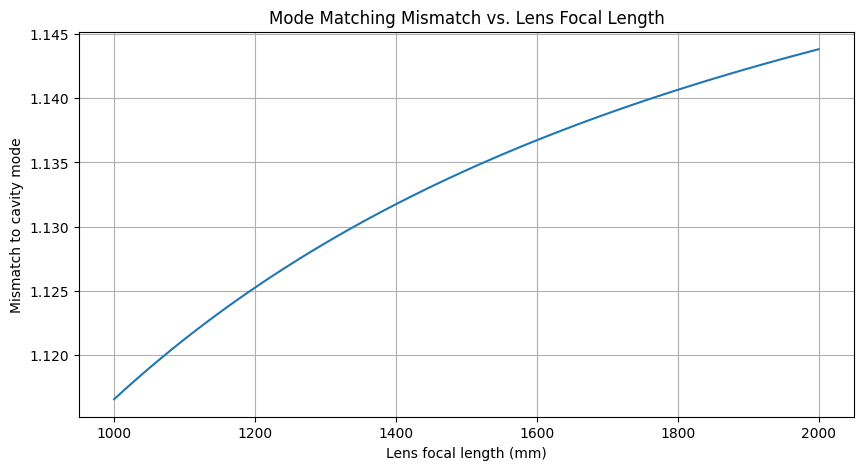

1.0

In [9]:
best_match = None
min_mismatch = float('inf')

mismatch_data = []

for f in focal_lengths:
    q_out = propagate_q(q_in, d1, f, d2)
    mismatch = match_quality(q_out, zR_target)
    mismatch_data.append(mismatch)
    if mismatch < min_mismatch:
        min_mismatch = mismatch
        best_match = f

# Plot match quality
plt.figure(figsize=(10, 5))
plt.plot(focal_lengths * 1e3, mismatch_data)
plt.xlabel("Lens focal length (mm)")
plt.ylabel("Mismatch to cavity mode")
plt.title("Mode Matching Mismatch vs. Lens Focal Length")
plt.grid(True)
plt.show()

best_match